## Identifying Successful Film Trends and Opportunities for Microsoft Movie Studio


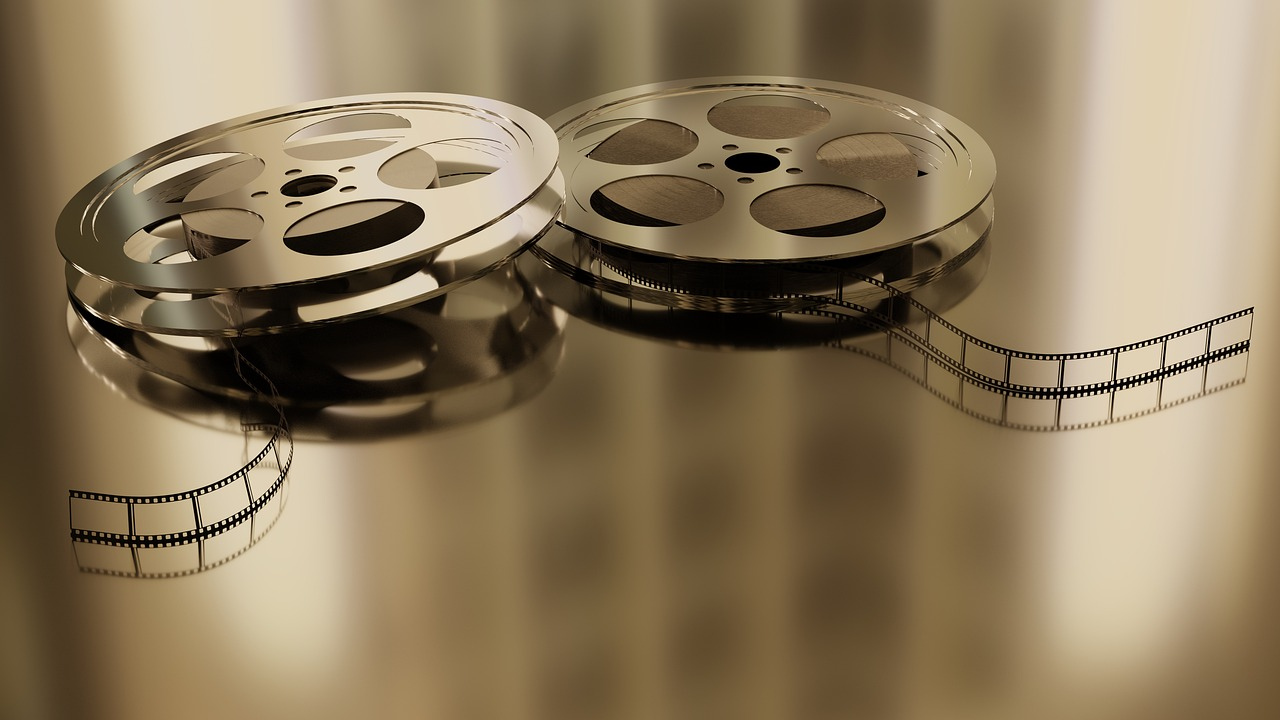

In [21]:
from IPython.display import Image
Image('/Users/zenah/Desktop/PROJECTS/first_project/film.jpg')

#### Business Statement
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

#### Objective
Microsoft Movie Studio will be a new revenue stream for Microsoft. A successful movie studio can improve brand recognition which in turn will help with the sales of already existing microsoft products. I'll be performing data analysis and exploration techniques using pandas. The goal is to identify the key factors contributing to the success of movies and provide  insights that inform on the content strategy of Microsoft's new movie studio. Some of the questions we'll try to answer to guide our decisions are;
      
 1. Which are the most profitable genres in the film industry?
 2. What is the distribution of movie by studio?
 3. Which movies have the highest popularity over the years?
 4. Which companies make the highest revenues?

 
       

#### Datasets


For this project I will work with two datasets to try and achieve the objective. The first dataset(hype) is pretty clean with no missing values which gives a nice impression of the data. This data ranges from 1930 to 2020. The second dataset(staple) however has a few missing values on the studio and domestic_gross columns with data ranging from 2010 to 2018.

In [8]:
#Import the necessary libraries
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 



In [9]:
#Loading data to pandas dataframe and exploring head.
hype = pd.read_csv('/Users/zenah/Desktop/PROJECTS/first_project/Data/tmdb.movies.csv', index_col=0)
hype.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [10]:
#Data Insights
print(hype.shape)

print(hype.dtypes)

(26517, 9)
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object


In [11]:
#Checking for any null values
hype.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [12]:
#Finding the range of our dataset
print(hype['release_date'].min())
print(hype['release_date'].max())

1930-04-29
2020-12-25


In [13]:
#Loading the second dataset
staple = pd.read_csv('/Users/zenah/Desktop/PROJECTS/first_project/Data/bom.movie_gross.csv')
staple.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [14]:
#Data Insights
print(staple.shape)

print(staple.dtypes)

(3387, 5)
title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


In [15]:
#Checking for nulls
staple.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [17]:
#Finding the range of our dataset
print(staple['year'].min())
print(staple['year'].max())

2010
2018


### Performing Data Cleaning on the 'staple' dataset
After identifying and noting the columns with some missing values and considering the size of the dataset I decided to go with the latter option dropping the rows with misssing values for 'studio' and 'domestic_gross' columns. The 'foreign_gross' column however has alot more missing values, so I will just use the domestic gross for my analysis.


In [5]:
#Dropping rows with missing values in studio and domestic_gross columns
staple.dropna(subset = ['studio'], inplace = True)
staple.dropna(subset = ['domestic_gross'], inplace = True)

In [6]:
#Confirmation check that there are no missing values in the specified columns
assert staple['studio'].isna().sum() == 0
assert staple['domestic_gross'].isna().sum() == 0

In [10]:
"""
Now that we don't have missing values that would skew our analysis,
let us check the distribution of movies per studio to know the
companies that are currently dominating the industry.
"""

staple['studio'].value_counts()

studio
IFC           166
Uni.          147
WB            140
Magn.         136
Fox           136
             ... 
TVC             1
E1              1
ELS             1
PalT            1
Synergetic      1
Name: count, Length: 255, dtype: int64

Now let us see the movies that have been profitable over the years based on domestic gross.

In [15]:
#Finding movies with the highest revenue per year
staple = staple.loc[staple.groupby('year')['domestic_gross'].idxmax()]
staple

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000,2011
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
1131,The Hunger Games: Catching Fire,LGF,424700000.0,440300000,2013
1489,American Sniper,WB,350100000.0,197300000,2014
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3080,Black Panther,BV,700100000.0,646900000,2018


From the result above, it is clear that Buena Vista Movie Studio(BV) has been producing movies that get the highest revenue over the years. The top genres being Superhero film and Science fiction. This is a valuable insight for Microsoft studios if they want to make a film with a greater audience and that will result in high profits.

In [18]:
#The total movie revenue collected per release year.
staple_grouped = staple.groupby('year')['domestic_gross'].sum()
staple_grouped

year
2010    415000000.0
2011    381000000.0
2012    623400000.0
2013    424700000.0
2014    350100000.0
2015    936700000.0
2016    532200000.0
2017    620200000.0
2018    700100000.0
Name: domestic_gross, dtype: float64

The gross income varies over the years but this result shows it could a lucrative business for Microsoft Studios with the minimum profit being 350 million.